# General
### Optimization problem  
#### Newtown method  
#### ……  
#### Gradient descent  (√)
        be used in NN(Netural networks)

# Numpy VS Torch

In [49]:
import torch
import numpy as np

#np.arange()生成一个等差数组
np_data = np.arange(6)
print(np_data)

[0 1 2 3 4 5]


In [50]:
#将数组改写为2行3列的形式
np_data2 = np.arange(6).reshape((2,3))
print(np_data2)

[[0 1 2]
 [3 4 5]]


In [51]:
#tensor()将numpy数组转换为tensor张量
#torch.tensor() 的作用就是：把输入的数据（比如列表、numpy数组等）转化为 PyTorch 的张量对象
a = torch.tensor([1, 2, 3])
print(a)
b = torch.tensor([[1, 2], [3, 4]])
print(b)
arr = np.array([5, 6, 7])
c = torch.tensor(arr)
print(c)

tensor([1, 2, 3])
tensor([[1, 2],
        [3, 4]])
tensor([5, 6, 7])


In [52]:
#两种转化方式：
torch_data1 = torch.tensor(np_data2)
    #共享内存，不会复制数据，Tensor 和原 NumPy 数组指向同一块内存，也就是修改其中一个，另一个也会变
torch_data2 = torch.from_numpy(np_data2)
    #会复制数据，新建一块内存，Tensor 和原数据不共享内存
print(torch_data1)
print(torch_data2)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [53]:
#把 PyTorch 的张量（Tensor）转换为 NumPy 数组
tensor_array1 = torch_data2.numpy()
    #共享内存,修改其中一个，另一个也会变
tensor_array2 = np.array(torch_data2)##!!不推荐
print(tensor_array1)
print(tensor_array2)

[[0 1 2]
 [3 4 5]]
[[0 1 2]
 [3 4 5]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_11888\2338552418.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  tensor_array2 = np.array(torch_data2)##!!不推荐


In [54]:
#运算上的比较
data = [-2, -1, 0, 1, 2]
tensor = torch.tensor(data)
print('\nnp',np.abs(data))
print('\ntorch',torch.abs(tensor))
print('\nnp',np.sin(data))
print('\ntorch',torch.sin(tensor))


np [2 1 0 1 2]

torch tensor([2, 1, 0, 1, 2])

np [-0.90929743 -0.84147098  0.          0.84147098  0.90929743]

torch tensor([-0.9093, -0.8415,  0.0000,  0.8415,  0.9093])


In [55]:
#矩阵乘法matrix multiplication
data_ = [[1,2],[1,2]]
tensor_ = torch.tensor(data_)
print('\nnp\n',np.matmul(data_,data_))#接受两个参数
print('\ntorch\n',torch.mm(tensor_,tensor_))
#tensor.dot() 只适合一维张量    下面的例子输出的就是1×1+2×2+1×1+2×2
tensor_1 = torch.tensor([1,2,3,4])
print(tensor_1.dot(tensor_1))

#如果是二维张量，直接用dot()会报错
tensor_2 = torch.tensor(data_)
print(tensor_2.dot(tensor_2))#报错

#如果是二维张量，可以先用view()将其变为一维张量
print(tensor_2.view(-1).dot(tensor_2.view(-1)))




np
 [[3 6]
 [3 6]]

torch
 tensor([[3, 6],
        [3, 6]])
tensor(30)


RuntimeError: 1D tensors expected, but got 2D and 2D tensors

# Variable(历史遗留写法)

In [ ]:
import torch
from torch.autograd import Variable#古早写法，现代不需要

tensor_ = torch.FloatTensor([[1, 2], [3, 4]])
tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)#dtype(data type)用于指定张量/数组里每个元素的类型（如整型、浮点型、布尔型等）
variable = Variable(tensor, requires_grad=True)#requires_grad=True 表示这个变量要参与自动求导（即后续可以对它求梯度，用于神经网络训练）        #这样在反向传播时，PyTorch 会自动计算这个变量的梯度

In [ ]:
#### 现代写法
import torch
tensor_variable = torch.tensor([[1, 2], [3, 4]], dtype=torch.float, requires_grad=True)#合并了 Tensor 和 Variable

In [ ]:
print(tensor)
print(variable)
print(tensor_variable)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [ ]:
#运算
t_out = torch.mean(tensor*tensor)#逐元素相乘
v_out = torch.mean(tensor_variable*tensor_variable)
print(t_out)
print(v_out)
#t_out&v_out的关键区别：是否支持自动求导

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [ ]:
#t_out带有计算图,支持自动求导，可以.backward()，梯度会自动传回到 tensor_variable
v_out.backward()  # 反向传播，计算梯度
print(tensor_variable.grad)  # 输出 tensor_variable 的梯度
#tensor_variable.grad = d(v_out)/d(tensor_variable)(variable就是自变量x) = 1/4 * 2 * tensor_variable = tensor_variable / 2

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


#### 大概过程：前向传播 + 计算图构建 + 反向传播 + 梯度存储
①tensor_variable向前计算得到v_out。  
②然后构建出计算图，tensor_variable 是叶子节点（leaf variable），它参与后续所有运算。  
③调用.backward()时开始向后传播，“计算每个叶子变量对最终输出的梯度”，本质上就是对每个叶子变量求导，也就是计算输出（如 loss 或 v_out）对每个叶子变量的偏导数。  
④计算得到的梯度会存储在需要梯度的叶子变量的 .grad 属性里，这个属性就是“最终结果对每个叶子变量的偏导数”

# Activation Function
作用：给神经元“加点非线性”，让神经网络能够拟合和表达更复杂的函数关系。  
需要AF的原因：如果没有激励函数（即所有层都是线性变换），无论网络有多少层，整体还是一个线性模型，不能拟合复杂问题。
有了激励函数，网络就可以逼近各种非线性关系，比如图像识别、语音识别等复杂任务。
### 各种类型推荐的AF类型
卷积NN：relu  
循环NN：relu/tanh  
### 用法
y = AF(Wx+b)

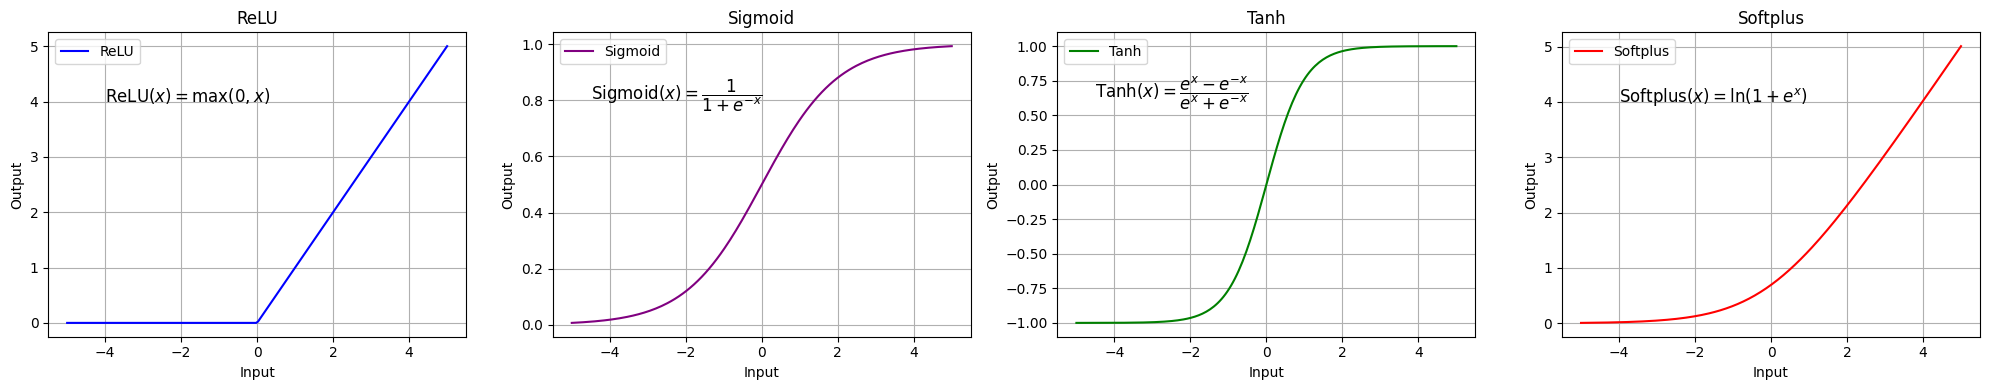

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 200, requires_grad=True) #在-5到5之间生成200个点
x_np = x.detach().numpy()#matplotlib绘图需要numpy数组,识别不了tensor   #detach()将tensor从计算图中分离出来，变成一个新的tensor，不再需要梯度计算，然后转换为numpy数组

y_relu = F.relu(x).detach().numpy()#ReLU激活函数
y_sigmoid = torch.sigmoid(x).detach().numpy()#Sigmoid激活函数
y_tanh = torch.tanh(x).detach().numpy()#Tanh激活函数
y_softplus = F.softplus(x).detach().numpy()#Softplus激活函数
#F.sigmoid(x)、F.tanh(x) 在现代 PyTorch 里是没有的，建议使用torch.sigmoid(x)、torch.tanh(x)

plt.figure(figsize=(20, 4))#figsize设置图形大小 #创建一个画布，尺寸是20×4英寸

plt.subplot(1, 4, 1)#把四个子图放在1×4的网格中，下面这个图画在第一个位置
plt.plot(x_np, y_relu, label='ReLU', color='blue')
plt.title('ReLU')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid() #显示网格
plt.legend() #显示图例
plt.text(-4, 4, r'$\mathrm{ReLU}(x) = \max(0, x)$', fontsize=12, color='black') #在图中添加公式文本

plt.subplot(1, 4, 2)
plt.plot(x_np, y_sigmoid, label='Sigmoid', color='purple')
plt.title('Sigmoid')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.text(-4.5, 0.8, r'$\mathrm{Sigmoid}(x) = \dfrac{1}{1 + e^{-x}}$', fontsize=12, color='black')

plt.subplot(1, 4, 3)
plt.plot(x_np, y_tanh, label='Tanh', color='green')
plt.title('Tanh')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.text(-4.5, 0.625, r'$\mathrm{Tanh}(x) = \dfrac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$', fontsize=12, color='black')

plt.subplot(1, 4, 4)
plt.plot(x_np, y_softplus, label='Softplus', color='red')
plt.title('Softplus')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.text(-4, 4, r'$\mathrm{Softplus}(x) = \ln(1 + e^{x})$', fontsize=12, color='black')

plt.tight_layout()#自动调整子图之间的间距，使所有标题、标签、刻度等都不重叠，整个图像排版更美观
plt.show()

## NN分为Regression(回归)和classification(分类)
regression：离散的数据拟合为连续的图线  
classification：识别图片是是什么，将其分类（比如在一堆图片中分类出猫和狗）

# Regression

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
##对于 plt.scatter(x.data.numpy(), y.data.numpy())，其实一维 (100,) 和二维 (100, 1) 都可以画，因为 numpy 会自动把 (100, 1) 展平成 (100,)。
##但如果后续你要把 x 喂给神经网络，两维格式更安全、更通用。

##### shape(x,y)表示这个tensor是一个x行y列的二维数组  
linspace(-1, 1, 100)在 -1 到 1 之间生成 100 个等间距的数字,是一个一维向量，他的shape就是(100,)  
.unsqueeze()就是增加维数的函数，dim指定加入维数的位置  
dim=0：加在左边，变成“1行100列”  
dim=1：加在右边，变成“100行1列”  

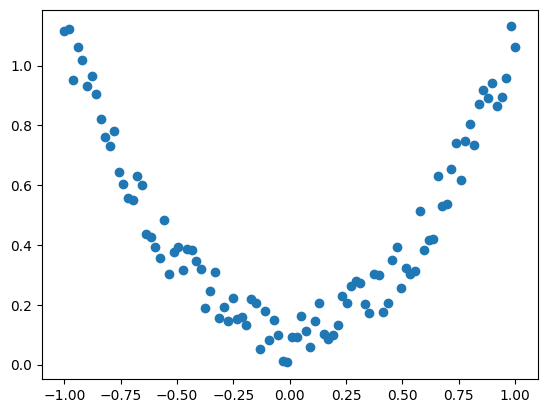

In [ ]:
y = x.pow(2) + 0.2*torch.rand(x.size())#.size()返回和x张量相同的形状，保证每个x(shape is (100,))都可以加一个噪声    加上均匀分布 [0, 1) 的随机数噪声

plt.scatter(x.data.numpy(),y.data.numpy())#为了与matplotlib兼容，所以先转换为numpy #生成散点图
plt.show()

In [ ]:
#搭建NN

class NeuralNetwork(nn.Module):#nn.Module 是 PyTorch 里所有神经网络层和模型的基类,这样写的原因，是让你的自定义神经网络类继承自 PyTorch 的 nn.Module 基类
    def __init__(self,n_feature, n_hidden, n_output):
        super(NeuralNetwork, self).__init__()#必须要有这一行，调用父类的构造函数，初始化 nn.Module 的一些内部机制
        ##nn.Linear 用于连接一层神经元到下一层神经元，实现特征的加权和叠加，即y=Wx+b（W是权重矩阵，b是偏置）
        #第一层
        self.hidden_layer = nn.Linear(n_feature,n_hidden)#第一个参数为接受几个输入特征，第二个参数为输出几个神经元
        #n_feature输入特征数，n_hidden隐藏层神经元个数,创建了一个输入n_feature个，输出n_hidden个的线性层
        #第二层
        self.output_layer = nn.Linear(n_hidden, n_output)

    def forward(self, processing_tensor):#定义前向传播过程
        #processing_tensor:正在处理的张量
        #对第一层
        processing_tensor = F.relu(self.hidden_layer(processing_tensor))
        #对第二层
        processing_tensor = self.output_layer(processing_tensor)
        return processing_tensor

In [ ]:
#创造NN

#n_feature=1是因为点的横坐标是确定的，就是1到100的等差数列，只需要学习纵坐标
net = NeuralNetwork(n_feature=1, n_hidden=10, n_output=1)
print(net)#打印网络结构：输入1个特征 --> 传入隐藏层10个神经元 --> 输出1个特征

NeuralNetwork(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)


进行训练前的准备工作

In [ ]:
#定义优化器：神经网络参数优化
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)
#Stochastic Gradient Descent（随机梯度下降）
#net.parameters(): 获取网络中所有可学习的参数
#lr: 学习率，控制每次参数更新的"步长"；学习率越大，更新幅度越大；太大容易不收敛，太小收敛慢

In [ ]:
#定义损失函数
loss_fn = nn.MSELoss()#Mean Squared Error Loss：均方差损失函数

$\begin{equation}\text{MSE} = \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} (y_i - \hat{y}_i)^2\end{equation}$

In [ ]:
for t in range(200):#训练200次
    #传入参数x就是processing_tensor，开始向前计算
    prediction = net(x)
    #调用loss_fn，根据函数(MSE)传入参数
    loss = loss_fn(prediction, y)#计算损失值：预测值 - 真实值y

    optimizer.zero_grad()#将上一轮所有参数的梯度清零
    loss.backward()#误差反向传播，计算新一轮的参数更新值
    optimizer.step()#根据梯度更新参数，将参数更新值施加到net的parameters上

    if t % 20 == 0:#每20次打印一次损失值
        print('Epoch {}: loss = {:.4f}'.format(t, loss.item()))

Epoch 0: loss = 0.1115
Epoch 20: loss = 0.0528
Epoch 40: loss = 0.0236
Epoch 60: loss = 0.0110
Epoch 80: loss = 0.0334
Epoch 100: loss = 0.0085
Epoch 120: loss = 0.0071
Epoch 140: loss = 0.0067
Epoch 160: loss = 0.0064
Epoch 180: loss = 0.0062


In [ ]:
#可视化
import matplotlib.pyplot as plt

plt.ion()#开启交互模式，自动刷新和显示图像窗口，无需每次都用 plt.show() （interactive mode on）

optimizer = torch.optim.SGD(net.parameters(), lr=0.3)
loss_fn = nn.MSELoss()
for t in range(200):
    prediction = net(x)
    loss = loss_fn(prediction, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 5 == 0:
        plt.cla()#清除当前图形中的当前活动轴
        plt.scatter(x.data.numpy(), y.data.numpy())#绘制散点图
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)#绘制预测曲线
        plt.text(0.5, 0, f'Loss={loss.item():.4f}', fontdict={'size': 20, 'color': 'red'})#在图中添加损失值文本
        #.item()把loss中的tensor转为数值
        plt.pause(0.1)#暂停0.1秒，更新图像

IDE问题导致无法显示动态图，只有分立的静态图

# Classification

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn

n_data = torch.ones(100, 2)#生成100个二维数据点，初始值全为1
x0 = torch.normal(2*n_data, 1)#类别0，均值为2，标准差为1
#也就是以(2,2)为中心，标准差为1的正态分布生成数据，每行数据的均值是 [2, 2]，也就是二维空间中的点 (2, 2) （因为数据shape就是二维的）
y0 = torch.zeros(100)#类别0，标签为0
x1 = torch.normal(-2*n_data, 1)#类别1，均值为-2，标准差为1
#(-2,-2)
y1 = torch.ones(100)#类别1，标签为1
#数据集的每一行（一个样本数据）和标签的每个元素一一对应，它们的顺序就是“绑定”的方式

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)#cat()按行连接两个张量  #合并数据集
# FloatTensor = 32-bit floating point
y = torch.cat((y0, y1), ).type(torch.LongTensor)#合并标签
# LongTensor = 64-bit integer

torch.ones(a,b)生成一个shape是a行b列的全是1的数组  
k*n_data生成一个shape为100×2，全部都是k的数组（也就是相形状相同，改动值）
torch.normal(mean,std)  
合并后x的shape就是(200,2)，表示有200个样本，每个样本有两个特征（第一列和第二列）

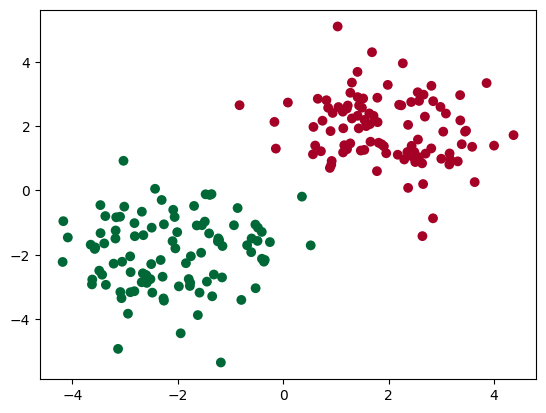

In [ ]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=50, lw=0, cmap='RdYlGn')#绘制散点图，c表示颜色，s表示点的大小，lw表示线宽，cmap表示颜色映射
plt.show()

##### 取横纵坐标的值
[a,b]取第a行第b列的元素  
x.data.numpy()[:, 0]：取所有行的第0列（第一个特征）作为散点图的横坐标（X轴）  
x.data.numpy()[:, 1]：取所有行的第1列（第二个特征）作为散点图的横坐标（y轴）  
##### 颜色
①'RdYlGn' 是一种从红色到黄色再到绿色的渐变色，不同标签的点用不同的颜色显示，颜色由标签值和这个色带决定  
②c=y.data.numpy()：指定每个点的颜色，依据标签值（如0或1）自动着色  
根据 c 里的值，把每个点映射到你指定的 colormap（颜色带）上  
标签为0的点会被映射到色带的一端（通常是红色或绿色，取决于色带方向）。  
标签为1的点会被映射到色带的另一端。  
如果标签有0、1、2等更多值，会有更多颜色。  
如果只有0和1，默认情况下，0会被映射到色带最左端（红或绿），1到最右端（绿或红）。  
③lw 是 linewidth（设置点的边框宽度）

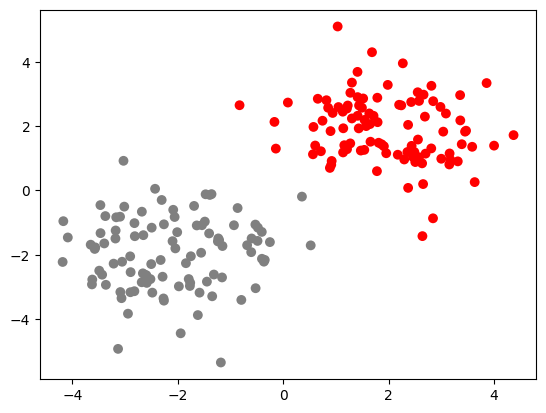

In [ ]:
#换一个颜色
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

my_cmap = ListedColormap(['red', 'grey'])
my_cmap1 = ListedColormap(['#FFAAAA', '#AAFFAA'])

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=50, lw=0, cmap=my_cmap)
plt.show()

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self,n_feature, n_hidden, n_output):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(n_feature,n_hidden)
        self.output_layer = nn.Linear(n_hidden, n_output)
    def forward(self, processing_tensor):
        processing_tensor = F.relu(self.hidden_layer(processing_tensor))
        processing_tensor = self.output_layer(processing_tensor)
        return processing_tensor

#在这个例子中要学习two features（横和纵坐标），同样有two outputs
net = NeuralNetwork(n_feature=2, n_hidden=10, n_output=2)
print(net)

NeuralNetwork(
  (hidden_layer): Linear(in_features=2, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
#classification换一个损失函数
loss_fn = nn.CrossEntropyLoss()

CrossEntropyLoss：自带softmax(概率)  
输出每个类别的概率，比如 [0.2, 0.7, 0.1]（有三个类，这个点属于每个类的概率）

In [ ]:
plt.ion()
plt.show()

for t in range(200):
    out = net(x)#out的shape是(200,2)
    loss = loss_fn(out, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 20 == 0:#每20次打印一次损失值
        print('Epoch {}: loss = {:.4f}'.format(t, loss.item()))

#可视化    
# if t % 2 == 0:
#         plt.cla()
#         # 过了一道 softmax 的激励函数后的最大概率才是预测值
#         prediction = torch.max(F.softmax(out), 1)[1]
#         pred_y = prediction.data.numpy().squeeze()
#         target_y = y.data.numpy()
#         plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
#         accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
#         plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
#         plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

Epoch 0: loss = 1.0918
Epoch 20: loss = 0.0906
Epoch 40: loss = 0.0509
Epoch 60: loss = 0.0363
Epoch 80: loss = 0.0287
Epoch 100: loss = 0.0240
Epoch 120: loss = 0.0208
Epoch 140: loss = 0.0184
Epoch 160: loss = 0.0166
Epoch 180: loss = 0.0152


# 快速搭建法——Sequential

In [ ]:
import torch
import torch.nn as nn

net2 = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 2)
)
print(net)#上面的那种方法定义出来的net
print(net2)

NeuralNetwork(
  (hidden_layer): Linear(in_features=2, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
#命名子层

net3 = nn.Sequential(OrderedDict([
    ('linear1', nn.Linear(2, 10)),
    ('act1', nn.ReLU()),
    ('linear2', nn.Linear(10, 2))
]))

#OrderedDict 需要传入一个列表，列表里的每个元素是 (名字, 层) 这种二元组

# 保存和提取

PyTorch 2.6以后，torch.load 默认只允许加载权重（state_dict），不能加载整个模型（pickle模型对象）

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

def save():
    net1 = nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )
    
    torch.save(net1.state_dict(), 'net1_params.pth')#仅保存权重
    torch.save(net1, 'entire_model.pth')#保存整个模型
    torch.save({'model': net1.state_dict()}, 'checkpoint.pth') #保存多个内容，用字典


#把上方net1的参数加载到net2
# def restore_net():
#     #加载整个模型
#     net2 = torch.load('entire_model.pth')


#把上方net2的参数加载到net3
def store_params():
    net3 = nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )
    net3.load_state_dict(torch.load('net2_params.pth'))

torch.load('net2_params.pth')————加载net2里的参数  
net3.load_state_dict()       ————把net2的参数赋值到net3里

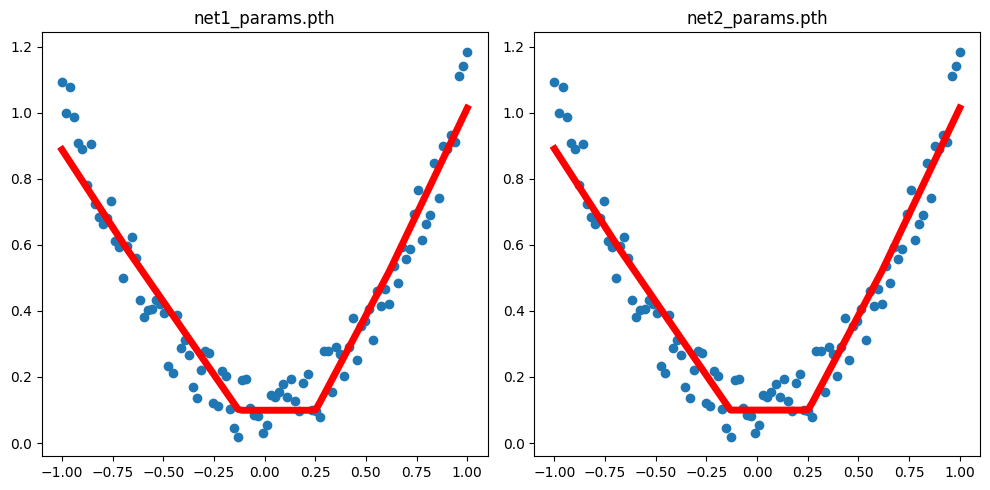

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

def save():
    net1 = nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #出图net1
    plt.subplot(1,2,1)
    plt.title('net1_params.pth')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    torch.save(net1.state_dict(), 'net1_params.pth')
    torch.save(net1, 'entire_model.pth')
    
# def restore_net():
#     net2 = torch.load('entire_model.pth')
#     prediction = net2(x)
    
#     #出图
#     plt.figure(1,figsize=(10,3))
#     plt.subplot(1,3,2)
#     plt.title('net2_params.pth')
#     plt.scatter(x.data.numpy(), y.data.numpy())
#     plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
#     plt.show()
    
def store_params():
    net2 = nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )
    net2.load_state_dict(torch.load('net1_params.pth'))
    prediction = net2(x)
    
    #出图
    plt.subplot(1,2,2)
    plt.title('net2_params.pth')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

#注意建画布，调用函数，显示的顺序
plt.figure(figsize=(10,5))
save()
store_params()
plt.tight_layout()
plt.show()

plt.plot(x,y,……):画线函数 前两个参数是横纵坐标  
'r-':字符串参数，指定线型和颜色，r红色，-实线  
lw=5:linewide 线粗

# 批量训练

把数据分成一小批一小批的来进行训练

In [ ]:
import torch
import torch.utils.data as Data

BATCH_SIZE = 5

#(head,tail,step)
x = torch.linspace(1, 10, 10)#生成1到10的等差数列，共10个点
y = torch.linspace(10, 1, 10)
print(x.shape)

#把张量 x 和 y 组合成一个数据集对象 torch_dataset放入Dataset，方便后期用 DataLoader 来批量读取数据
torch_dataset = Data.TensorDataset(x, y)
#
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE, #每次训练时只取batch_size个样本
    shuffle=True#表示每次读取数据时打乱顺序
)  

for epoch in range(3):#遍历数据集3次
    for step, (batch_x, batch_y) in enumerate(loader):#enumerate()函数用于将一个可遍历的数据对象（如列表、元组或字符串）组合为一个索引序列，同时列出数据和数据下标
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ', batch_x.numpy(), '| batch y: ', batch_y.numpy())

torch.Size([10])
Epoch:  0 | Step:  0 | batch x:  [ 8. 10.  4.  3.  6.] | batch y:  [3. 1. 7. 8. 5.]
Epoch:  0 | Step:  1 | batch x:  [9. 2. 7. 5. 1.] | batch y:  [ 2.  9.  4.  6. 10.]
Epoch:  1 | Step:  0 | batch x:  [ 7. 10.  3.  1.  6.] | batch y:  [ 4.  1.  8. 10.  5.]
Epoch:  1 | Step:  1 | batch x:  [9. 5. 4. 8. 2.] | batch y:  [2. 6. 7. 3. 9.]
Epoch:  2 | Step:  0 | batch x:  [7. 4. 5. 6. 3.] | batch y:  [4. 7. 6. 5. 8.]
Epoch:  2 | Step:  1 | batch x:  [ 1.  2.  8. 10.  9.] | batch y:  [10.  9.  3.  1.  2.]


传入Data.TensorDataset()的数据集的第一个特征必须相同（也就是个数必须相同），shape可以不同，即：  
x.shape = (100, 20)   # 100 个样本，每个样本 20 个特征  
y.shape = (100,)      # 100 个标签，每个标签是一个数  
y.shape = (100, 1)    # 100 个标签，每个标签是一个向量  
y.shape = (100, 3)    # 100 个标签，每个标签是三个数（比如多分类 one-hot）  

加索引函数：for idx, item in enumerate(iterable): # idx 是索引（从 0 开始），item 是内容  
idx是自动递增的，不需要手动递增  
(batch_x, batch_y)会自动和原来的 (x, y) 一一对应，无需手动处理

In [ ]:
BATCH_SIZE2 = 8 #每个epoch的第二个step不足8个则只训练剩下的两个
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE2,
    shuffle=True
)  
for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ', batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [2. 6. 5. 7. 1. 9. 4. 3.] | batch y:  [ 9.  5.  6.  4. 10.  2.  7.  8.]
Epoch:  0 | Step:  1 | batch x:  [ 8. 10.] | batch y:  [3. 1.]
Epoch:  1 | Step:  0 | batch x:  [ 7.  9.  8.  1.  4. 10.  6.  3.] | batch y:  [ 4.  2.  3. 10.  7.  1.  5.  8.]
Epoch:  1 | Step:  1 | batch x:  [2. 5.] | batch y:  [9. 6.]
Epoch:  2 | Step:  0 | batch x:  [ 8.  6.  2.  9. 10.  1.  5.  7.] | batch y:  [ 3.  5.  9.  2.  1. 10.  6.  4.]
Epoch:  2 | Step:  1 | batch x:  [3. 4.] | batch y:  [8. 7.]


In [ ]:
BATCH_SIZE3 = 3 #step没有限制，直到这个epoch把所有的数据训练完
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE3,
    shuffle=True
)  
for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ', batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [6. 3. 8.] | batch y:  [5. 8. 3.]
Epoch:  0 | Step:  1 | batch x:  [2. 9. 5.] | batch y:  [9. 2. 6.]
Epoch:  0 | Step:  2 | batch x:  [10.  4.  7.] | batch y:  [1. 7. 4.]
Epoch:  0 | Step:  3 | batch x:  [1.] | batch y:  [10.]
Epoch:  1 | Step:  0 | batch x:  [5. 6. 9.] | batch y:  [6. 5. 2.]
Epoch:  1 | Step:  1 | batch x:  [10.  3.  4.] | batch y:  [1. 8. 7.]
Epoch:  1 | Step:  2 | batch x:  [2. 7. 1.] | batch y:  [ 9.  4. 10.]
Epoch:  1 | Step:  3 | batch x:  [8.] | batch y:  [3.]
Epoch:  2 | Step:  0 | batch x:  [9. 3. 4.] | batch y:  [2. 8. 7.]
Epoch:  2 | Step:  1 | batch x:  [7. 8. 5.] | batch y:  [4. 3. 6.]
Epoch:  2 | Step:  2 | batch x:  [10.  1.  2.] | batch y:  [ 1. 10.  9.]
Epoch:  2 | Step:  3 | batch x:  [6.] | batch y:  [5.]


# Optimizers Accelerate NN training

### SGD(most commonly used)  
### Momentum + AdaGrad = RMSProp --> Adam

# Optimizers

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y = x.pow(2) + 0.1*torch.normal(mean=torch.zeros(*x.size()), std=1)

*x.size()  
x.size() 返回张量 x 的形状（比如 (1000, 1)）然后前面的 * 是 Python 的解包操作符，将形状元组解包成单独的参数(即1000,1)传递给 torch.zeros() 函数  
也就是torch.zeros(*x.size())就相当于 torch.zeros(1000，1)  
如果不用* 即torch.zeros(x.size())，就是torch.zeros((1000，1))

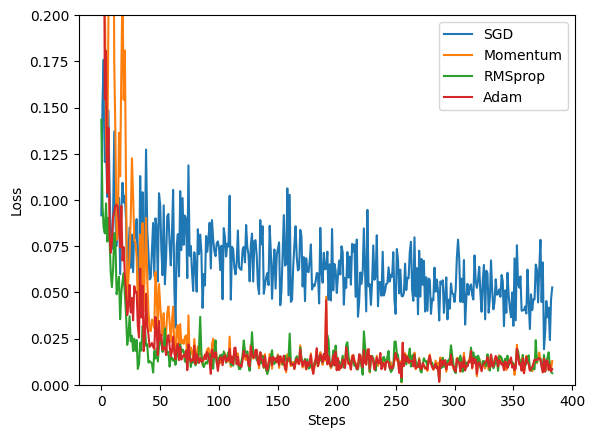

In [ ]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

class NeuralNetwork(nn.Module):
    def __init__(self,n_feature, n_hidden, n_output):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(n_feature,n_hidden)
        self.output_layer = nn.Linear(n_hidden, n_output)
    def forward(self, processing_tensor):
        processing_tensor = F.relu(self.hidden_layer(processing_tensor))
        processing_tensor = self.output_layer(processing_tensor)
        return processing_tensor

net_SGD = NeuralNetwork(n_feature=1, n_hidden=20, n_output=1)
net_Momentum = NeuralNetwork(n_feature=1, n_hidden=20, n_output=1)
net_RMSprop = NeuralNetwork(n_feature=1, n_hidden=20, n_output=1)
net_Adam = NeuralNetwork(n_feature=1, n_hidden=20, n_output=1)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.9)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_fn = nn.MSELoss()
losses_his = [[], [], [], []]#记录四种优化器的损失值变化

for epoch in range(EPOCH):
    for step, (x_batch, y_batch) in enumerate(loader):
        
        #zip(iterable1, iterable2, iterable3, ...):每次从所有输入的可迭代对象里各取一个元素，组合成一个元组
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output = net(x_batch)
            loss = loss_fn(output, y_batch)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.item())#这是里层循环，已经取出了losses_his（大列表）中的一个小列表，所以直接加在末尾就行

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i,l_his in enumerate(losses_his):#对losses_his引入索引值是为画图的时候提供横坐标
    plt.plot(l_his, label=labels[i])#画图时，横坐标默认是索引（比如第 0,1,2,...步），纵坐标是 l_his 的数值。等价于 plt.plot(range(len(l_his)), l_his, label=labels[i])，不过 matplotlib 会自动这样处理。 #label=labels[i]：指定这一条线的标签（图例）
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend(loc='best')#用于显示图例，loc='best'表示自动选择最佳位置
plt.ylim((0,0.2))#限制 y 轴最小值为 0，最大值为 0.2
plt.show()

# Convolutional Neural Network(CNN)

可应用于图像分类，目标检测，图像分割，人脸识别与验证，图像生成与风格迁移，视频分析，图像超分辨率、去噪……在CV领域用处颇广

torchvision 是 PyTorch 官方提供的CV工具库，包含了很多常用的数据集和数据预处理工具。  
datasets.MNIST 是其中的数据集类之一，专门用于 MNIST 数据集，用于自动下载和加载经典的 MNIST 手写数字数据集

In [57]:
import torch
import torch.nn as nn
import torchvision
import torch.utils.data as Data
import matplotlib.pyplot as plt

EPOCH = 1
BATCH_SIZE = 50
LR = 0.00015
DOWNLOAD_MNIST = False #是否下载数据集，若本地已经下载过则设为 False

train_data = torchvision.datasets.MNIST(
    root='./data', 
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)


①root='./data', 数据集的下载和保存路径,MNIST 数据会下载/解压到 ./data 这个文件夹下  
②train=True,选择加载的是训练集还是测试集。train=True：加载训练集（60000 张图片）;train=False：加载测试集（10000 张图片）  
③transform=torchvision.transforms.ToTensor(),把每张图片由 PIL.Image 或 numpy.ndarray 格式转成 PyTorch 用的 tensor 格式，并且像素值缩放到 [0,1] 区间（浮点数）（将图片由RGB压缩为灰白二维）  
④download=True 是否需要下载数据集。如果为 True，则自动下载数据集（当本地没有时）

torch.Size([60000, 28, 28])
torch.Size([60000])


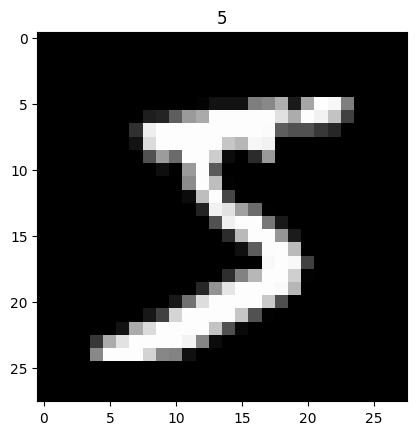

In [58]:
print(train_data.train_data.size())
# 打印包含所有训练图片的张量各维度的大小   # 60000 张 28x28 的图片
print(train_data.train_labels.size())
# 打印训练图片对应的标签（比如每个图片是哪个数字，0~9）   # 60000 个数字标签
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
#imshow = image show，用于输出第0张图片
#matplotlib 画图需要 numpy 格式，所以要把 PyTorch tensor 转成 numpy 数组
plt.title(f'{train_data.train_labels[0].item()}') # .item() 把张量转成 Python int （不加也可以）
plt.show()

In [59]:
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)


In [60]:
test_data = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

#把测试图片变成了 shape 为 [10000, 1, 28, 28]、像素值在 0~1 之间(归一化处理)的 float 格式
test_x = torch.unsqueeze(test_data.data, dim=1).float() / 255.0
#这行代码把测试集前 2000 个图片的标签提取出来
test_y = test_data.test_labels[:1000]#[:2000]：只取前 2000 个标签

d:\deeplearning NN\.venv\Lib\site-packages\torchvision\datasets\mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


训练数据(traindata)  
用于训练模型，即让模型“学习”数据中的规律  
测试数据(testdata)  
用于评估模型的泛化能力，即测试模型在未见过的数据上的表现

In [61]:
#建立CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #第一层卷积层
        self.conv1 = nn.Sequential(         #这一层图片的维度为（1，28，28）（长宽高）
            nn.Conv2d(
                in_channels=1, #输入的图片的高度/通道数，灰度图就是1，彩色图就是3(r、g、b)
                out_channels=16, #卷积核的个数，即输出的通道数
                #就是有k个filter/kernel/卷积核在同一位置提取图片的特征，就把这k个特征叠起来（层数变为k）作为下一层的输入
                kernel_size=5, #卷积核的大小是5x5（单位：像素点）
                stride=1, #卷积核每次移动的步长，单位是像素点
                padding=2 #边缘处理：在图片的边缘补0，补2圈——>为了让输出的图片的长和宽保持不变
            ),
            nn.ReLU(),
            nn.MaxPool2d(2)#新的卷积核尺寸为2x2   #这一步之后图片的长宽发生改变
         )
        self.conv2 = nn.Sequential(         #(16，14，14)
            nn.Conv2d(16,32,5,1,2),         #(32，14，14)
            nn.ReLU(),
            nn.MaxPool2d(2)                 #(32，7，7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)#将三维的数据展平为一维，方便进行分类
        #10是out_features = 10，就是分类的类别数（比如MNIST手写数字识别有10个类别：0~9）
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)           #维度是(batch，32，7，7)
        x = x.view(x.size(0), -1)   #（batch，32*7*7） -1的作用即是把后三个三维展平为一维
        #view()用于重塑形状  #x.size(0)即取了x的shape的第一个特征量
        output = self.out(x)
        return output

每层卷积层包含以下的组件：  
nn.Conv2d(...)：二维卷积层，对输入图片做卷积操作，自动提取局部特征（比如边缘、纹理等）  
nn.ReLU()：AF，为卷积输出增加非线性，提升模型表达能力  
nn.MaxPool2d(2)：二维最大池化层，池化窗口大小为2。对特征图做降采样，减少数据量、参数量，增强特征的空间不变性。效果：每2x2区域取最大值，缩小特征图尺寸（比如从28x28变成14x14）

卷积：滑动遍历整张图片，变成若干张特征图（如16张）。   
激活：将特征图做非线性变换。  
池化：在卷积的基础上，筛选出重要信息。特征图尺寸减半，变成14×14，更精炼。

***每次卷积后的输出***（改变高度）：out_channels=16，意为16个卷积核同时处理了一块区域，叠加后得到了一个长和宽更小的，但是更厚（高）的patch作为输出  
***边缘处理的计算***：如果stride = 1，那么pedding = (kernal_size - 1)/2,这是为了保证输出图片的*长和宽*和原来*保持不变*  
***卷积出的特征图的拼接***：肯定会有重叠，中心位置对齐即可  
***池化层***（改变长和宽）：用一个比卷积层更小的filter遍历卷积层输出的特征图，挑选这个filter区域中的最大值作为新的像素的值（这只是MaxPool2d的做法），把这个filter覆盖的区域合并为一个像素块并把那个最大值作为其像素值

In [62]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [63]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

#training & testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        output = cnn(x)               # cnn output
        loss = loss_fn(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output = cnn(test_x[:1000])            # 1000张测试图片
            pred_y = torch.max(test_output, 1)[1].data.squeeze()#torch.max(test_output, 1)[1]：取每行最大值的索引作为预测类别
            accuracy = sum(pred_y == test_y) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3250 | test accuracy: 0.04
Epoch:  0 | train loss: 2.1443 | test accuracy: 0.32
Epoch:  0 | train loss: 1.6064 | test accuracy: 0.73
Epoch:  0 | train loss: 0.8898 | test accuracy: 0.81
Epoch:  0 | train loss: 0.5688 | test accuracy: 0.82
Epoch:  0 | train loss: 0.4071 | test accuracy: 0.84
Epoch:  0 | train loss: 0.6170 | test accuracy: 0.87
Epoch:  0 | train loss: 0.6023 | test accuracy: 0.87
Epoch:  0 | train loss: 0.2572 | test accuracy: 0.88
Epoch:  0 | train loss: 0.0931 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1975 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2938 | test accuracy: 0.90
Epoch:  0 | train loss: 0.3033 | test accuracy: 0.91
Epoch:  0 | train loss: 0.4409 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3750 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1639 | test accuracy: 0.92
Epoch:  0 | train loss: 0.3245 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2831 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1144 | test accuracy

In [ ]:
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
